Suppose $X, Y \overset{i.i.d.}{\sim} \mathcal{N}(0, 1)$. Then what is the distribution of $Z = X\cdot Y$?

Based off of: https://math.stackexchange.com/questions/101062/is-the-product-of-two-gaussian-random-variables-also-a-gaussian

Through some divine inspiration:
$$
\begin{align}
XY &= XY &+ \frac{1}{4}(X^2 - X^2 + Y^2 - Y^2) \\
   &= \frac{1}{2}XY + \frac{1}{2}XY &+ \frac{1}{4}(X^2 + Y^2 - X^2 - Y^2) \\
   &= \frac{1}{4}X^2 + \frac{1}{2}XY + \frac{1}{4}Y^2 &+ -\frac{1}{4}X^2 + \frac{1}{2}XY - \frac{1}{4}Y^2 \\
   &= \frac{1}{4}(X+Y)^2 &+ -\frac{1}{4}(X - Y)^2
\end{align}
$$

so $XY = \frac{1}{4}(X+Y)^2 -\frac{1}{4}(X - Y)^2$. 

It is well known that both $X + Y$ and $X - Y$, being simple linear combinations, follow normal distributions. In particular, lets define $A = X + Y$ and $B=X - Y$. Then $A, B \overset{i.i.d.}{\sim} \mathcal{N}(0, 2)$.

Sources: https://math.stackexchange.com/questions/4089604/the-sum-and-difference-of-two-independent-random-variables-is-independent

https://en.wikipedia.org/wiki/Kac%E2%80%93Bernstein_theorem

The independence of $A$ and $B$ is a consequence of the Kac-Bernstein theorem.

So for $Q=A^2$ and $R=B^2$, $Z \sim \frac{1}{2} Q - \frac{1}{2} R$ where $Q, R \overset{i.i.d.}{\sim} \chi_1^2$ are central Chi-square distributed with 1 df.

In [15]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

(-3.0, 3.0)

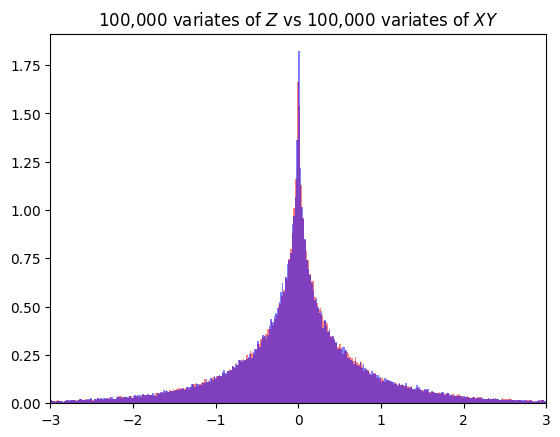

In [26]:
# A quick numerical simulation

seed1, seed2, seed3, seed4 = 420, 111, 69, 2222
mu, sigma = 0, 1
X, Y = norm(loc=mu, scale=sigma), norm(loc=mu, scale=sigma)
Q, R = chi2(df=1), chi2(df=1)

N = 100_000

Z = X.rvs(size=N, random_state=seed1) * Y.rvs(size=N, random_state=seed2)
Z2 = 1/2 * Q.rvs(size=N, random_state=seed3) - 1/2 * R.rvs(size=N, random_state=seed4)
plt.hist(Z, bins=1000, density=True, color='r', alpha=0.5)
plt.hist(Z2, bins=1000, density=True, color='b', alpha=0.5)
plt.title(f"{N:,} variates of $Z$ vs {N:,} variates of $XY$")
plt.xlim(-3, 3)